## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

#### 1) Linear Congruent
One of the easiest way to make random number is using linear congruential.

$$x_{n+1} = a x_{n} + b \mod 2^{31}$$

pick a random $a$ and $b$ then try.

In [4]:
a = 3
b = 7
x0 = 10
x= x0
n = 0
while n < 20:
    x = (a*x+b)%(2<<31)
    n+=1
    print(bin(x&11))


0b1
0b10
0b1001
0b10
0b1001
0b1010
0b1
0b1010
0b1
0b10
0b1001
0b10
0b1001
0b1010
0b1
0b1010
0b1
0b10
0b1001
0b10


#### 2) Cycle Problem

One of the problem with linear congruent is short cycle length. For example,

$$x_{n+1} =  ax_{n} + b \mod 11$$

No matter what value you give $a$ and $b$. Your cycle length will be at most 11.

In [1]:
a = 3
b = 7
x0 = 10
x= x0
n = 0
while n < 20:
    x = (a*x+b)%(11)
    n+=1
    print(x, end=' ')

4 8 9 1 10 4 8 9 1 10 4 8 9 1 10 4 8 9 1 10 

#### 3) Fixing Cycle problem

One way to do it is to generate it with a better cycle and then mod 11.

#### 4) Some available random number from numpy/python

`np.random.random` for random a float uniformly between 0 and 1.

`np.random.randint` for random integer uniformly in some range.

`np.random.randn` for random float from normal distribution with mean 0 and standard deviation 1.

In [6]:
from numpy.random import random, randint, randn
random()

0.6744854847052877

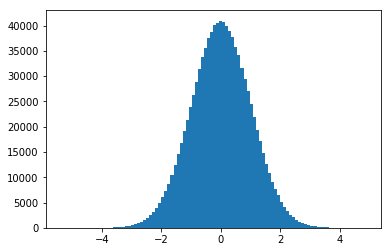

In [7]:
x = np.random.randn(1000000)
plt.hist(x,bins = 100);

#### 5) Manipulating random number to get desired behavior.

Random a float from 0 to 5.

Random a float from -1 to 1.

Random a float form normal distribution with mean 5 and std dev 1.

Random a float form normal distribution with mean 2 and std dev 10.

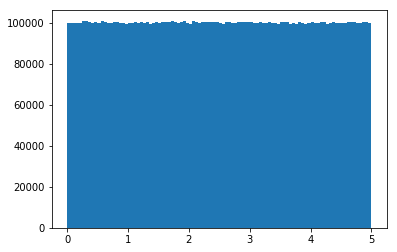

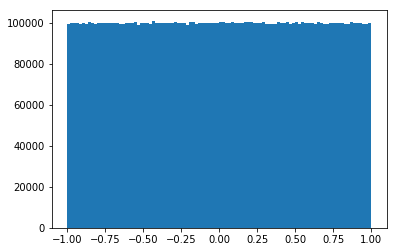

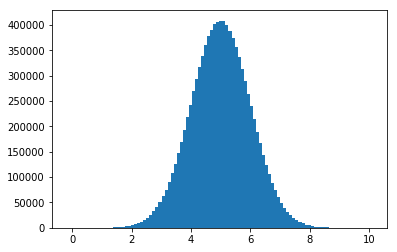

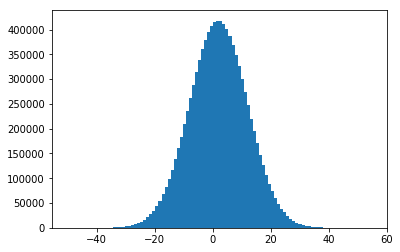

In [8]:
#Random a float from 0 to 5.
x = np.random.random(10000000)*5
# print(x)
plt.hist(x,bins = 100);
plt.figure(10000000)
#Random a float from -1 to 1.
x = (np.random.random(10000000)*2 -1)
# print(x)
plt.hist(x,bins = 100);
plt.figure()
#Random a float form normal distribution with mean 5 and std dev 1.
x = (np.random.randn(10000000) + 5)
# print(x)
plt.hist(x,bins = 100);
plt.figure()
#Random a float form normal distribution with mean 2 and std dev 10.
x = (np.random.randn(10000000)*10+2)
# print(x)
plt.hist(x,bins = 100);
plt.figure()

6) What does np.random.seed do?

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

In [9]:
from numpy.random import random, randint, randn
def f():
    x = np.random.random()*2 -1 # size is 2
    y = np.random.random()*2 -1
    z = np.random.random()*2 -1
    return (x**2)*((y-1)**2)*((z-2)**2)*np.exp(x*y*z)

In [10]:
many_times = 1000000 # pick n  some pieces
n = many_times
v = 2 * 2 *2 #volume of the thing want to intigrate
sum([f() for i in range(n)]) * v/n

16.063052974200538

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

In [11]:
from numpy.random import random, randint, randn
def f():
    r = 1
    x = np.random.random()*2 -1 # size is 2
    y = np.random.random()*2 -1
    z = np.random.random()*2 -1
    if (x**2 + y**2 + z**2)**0.5 > r: # if it is not in the sphere
        return 0
    return (x**2)*((y-1)**2)*((z-2)**2)*np.exp(x*y*z)

In [12]:
many_times = 1000000 # pick n  some pieces
n = many_times
v = 2*2*2 #volume of the thing want to intigrate still use a box
sum([f() for i in range(n)]) * v/n

3.9700546152111884

3) Do we guarantee to get the same answer when we repeat the experiment?

In [11]:
#no

4) What do we need to do to guarantee the same answer?

In [12]:
#seed the random

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

In [13]:
#mesure the width  of the distibution
# in my norebook

## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

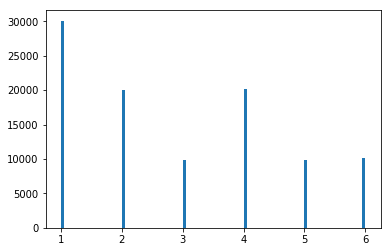

In [14]:
#my ver
def roll():
    import random as rad
    prob_dice = [1,1,1,2,2,3,4,4,5,6]
    return rad.choice(prob_dice)
n = 100000
x = [roll() for i in range(n)]

plt.hist(x,bins = 100);

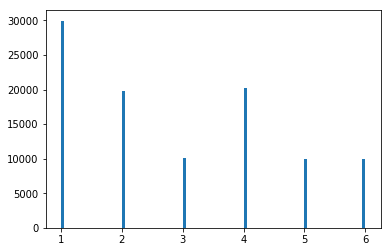

In [15]:
def roll2():
    x = np.random.random()
    if x <= 0.3:
        return 1
    if x <= 0.5:
        return 2
    if x <= 0.6:
        return 3
    if x <= 0.8:
        return 4
    if x <= 0.9:
        return 5
    else:
        return 6
n = 100000
x = [roll2() for i in range(n)]

plt.hist(x,bins = 100);  

#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

In [16]:
n = 100000
sum([roll() for i in range(n)])/n

2.90649

3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

In [17]:
sum(roll()+roll() for i in range(n))/n

5.79082

4) What is the expected value of $AB$?

In [18]:
sum(roll()*roll() for i in range(n))/n

8.43381

5) Try the experiment 10,000 times and plot out the probability of getting each result for $AB$. (Probability is given by # of times we get the number/total number of experiment.

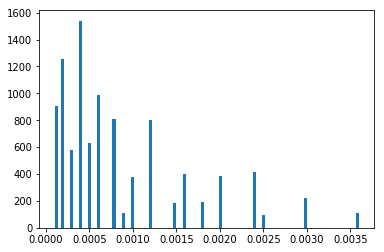

In [19]:
n = 10000
result=[sum([roll()*roll()])/n for i in range(n)]
plt.hist(result, bins = 100);

6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

In [20]:
n = 10000
drw = 0
for i in range(n):
    a = roll() *roll() #player a
    b = roll() * roll() # player b
    if a == b:
        drw +=1
print(drw/n)

0.0784


7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

In [21]:
n = 10000
win = 0
for i in range(n):
    a = 3 * roll()
    b = roll() *roll()
    if a > b:
        win +=1
print(win/n)

0.5331


### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

In [22]:
def next_price(s, mu, sigma, dt):
    e = np.random.randn()
    return s + s*(mu*dt + e*sigma*np.sqrt(dt))

2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

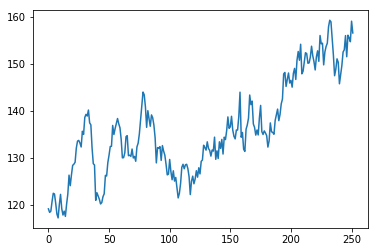

In [23]:
# np.random.seed(123)
def gen_1year(mu, sigma):
    ret = []
    ndays = 252
    s = 119.21
    dt = 1./ndays
    ret.append(s)
    for i in range(ndays-1):
        s = next_price(s,mu,sigma,dt)
        ret.append(s)
    return ret
prices = gen_1year(0.0877, 0.28)
plt.plot(prices)

3) What is the expected value of the stock at the end of year?

In [24]:
mu = 0.0877
sigma = 0.28
gen_20Univser = [gen_1year(mu, sigma) for i in range(10000)]

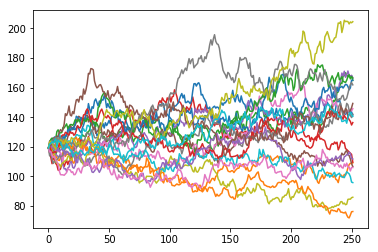

In [25]:
for i in range(20):
    plt.plot(range(252),gen_20Univser[i])

130.275319372


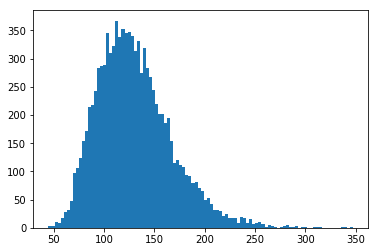

In [26]:
end_of_yesrs = [gen_20Univser[i][-1] for i in range(10000)]
plt.hist(end_of_yesrs, bins = 100)
expcted_var = sum(end_of_yesrs)/10000.
print(expcted_var)

4) What is the variance of the stock at the end of the year?

In [27]:
avr = np.average(end_of_yesrs)
varience = sum([(price - avr)**2/len(end_of_yesrs) for price in end_of_yesrs])
print(varience)
print(np.var(end_of_yesrs))

1376.97902865
1376.97902865


5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

In [28]:
#supid version
c = 0
for year in gen_20Univser:
    for day in year:
        if day < 70:
            c +=1
            break
print(c/(len(gen_20Univser)))

0.0371


In [29]:
def dip_below70(year):
    for day in year:
        if day < 70:
            return 1
    return 0
indicator = [dip_below70(y) for y in gen_20Univser]
np.average(indicator)

0.037100000000000001

6) What is the proabability that th stock will dip below 100 and come back to 110 within a year? 

In [30]:
#supid version
def comback_Is_real(year):
    below100 = False
    for day in year:
        if day<100:
            below100 = True
        if below100 and day> 110:
            return 1
    return 0
indicator = [comback_Is_real(y) for y in gen_20Univser]
np.average(indicator) 

0.25819999999999999

### Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

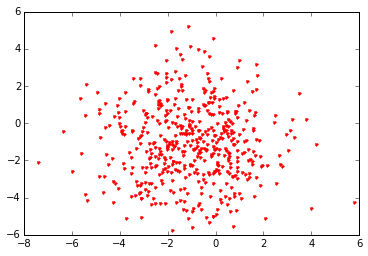

In [9]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [1]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0 25 27 ..., 40  0 54]
 [25  0 64 ...,  0  0  8]
 [27 64  0 ...,  0 69 45]
 ..., 
 [40  0  0 ...,  0 25 70]
 [ 0  0 69 ..., 25  0 66]
 [54  8 45 ..., 70 66  0]]


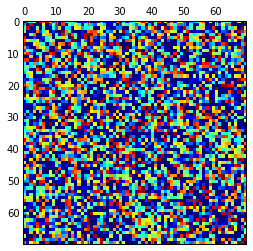

In [105]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0
    
print student

plt.matshow(student)

### Simulated Annealing

1) What's wrong with Hill Climbing?

2) What is the main idea for fixing that?

3) Implement the exam scheduling again with Simulated Annealing